##### Version 0.1 -- February 2014

# JITcode 1, lesson 1

This is lesson 1 of the first *Just-in-Time (JIT) module* for teaching computing to engineers, in context. The first module lays the foundations for building computational skills. It is not meant to support a particular engineering course, so it can be used by freshman students. The context problems should be interesting to any science-minded student.

Lesson 1 builds competency on these basic skills:

* reading data from a file in comma-separated format (CSV)
* plotting data
* analyzing data with statistics
* writing an image of a plot to a file


## Context — Earth temperature over time

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](http://svs.gsfc.nasa.gov/goto?3901) is one of our sources of global climate data. They produced this video showing a color map of the changing global surface **temperature anomalies** from 1880 to 2011.

The term [_global temperature anomaly_](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyb4gau3LyI')

How would we go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots. We are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to smooth the data and then we'll fit a line to it to find a trend, plotting along the way to see how it all looks.

Let's get started!

The first thing to do is to load our favorite library: the **NumPy** library for array operations.

In [2]:
import numpy

Make sure you have studied the introduction to [_JITcode_ in Python](http://nbviewer.ipython.org/github/barbagroup/JITcode-MechE/blob/master/lessons/00_Lesson00_QuickPythonIntro.ipynb) to know a bit about this library and why we need it.

## Step 1: Read a data file

The data is contained in the file:

`GlobalTemperatureAnomaly-1958-2008.csv`

with the year on the first column and 12 monthly averages of temperature anomaly listed sequentially on the second column. We will read the file, then make an initial plot to see what it looks like.

To load the file, we use a function from the NumPy library called `loadtxt()`. To tell Python where to look for this function, we precede the function name with the library name, and use a dot between the two names. This is how it works:

In [3]:
numpy.loadtxt(fname='./resources/GlobalTemperatureAnomaly-1958-2008.csv', delimiter=',')

array([[  1.95800000e+03,   2.67300000e-01],
       [  1.95808000e+03,   7.92000000e-02],
       [  1.95817000e+03,  -4.18000000e-02],
       ..., 
       [  2.00875000e+03,   4.07400000e-01],
       [  2.00883000e+03,   4.51300000e-01],
       [  2.00892000e+03,   3.51900000e-01]])

Note that we called the function with two parameters: the file name and path, and the delimiter that separates each value on a line (a comma). Both parameters are strings (made up of characters) and we put them in single quotes.

As the output of the function, we get an array. Because it's rather big, Python shows only a few rows and columns of the array. 

So far, so good. Now, what if we want to manipulate this data? Or plot it? We need to refer to it with a name. We've only just read the file, but we did not assign the array any name! Let's try again.

In [4]:
T=numpy.loadtxt(fname='./resources/GlobalTemperatureAnomaly-1958-2008.csv', delimiter=',')

That's interesting. Now, we don't see any output from the function call. Why? It's simply that the output was stored into the variable `T`, so to see it, we can do:

In [5]:
print(T)

[[  1.95800000e+03   2.67300000e-01]
 [  1.95808000e+03   7.92000000e-02]
 [  1.95817000e+03  -4.18000000e-02]
 ..., 
 [  2.00875000e+03   4.07400000e-01]
 [  2.00883000e+03   4.51300000e-01]
 [  2.00892000e+03   3.51900000e-01]]


Ah, there it is! Let's find out how big the array is. For that, we use a cool NumPy function called `shape()`:

In [6]:
numpy.shape(T)

(612, 2)

Again, we've told Python where to find the function shape() by attaching it to the library name with a dot. However, NumPy arrays also happen to have a property shape that will return the same value, so we can get the same result another way:

In [7]:
T.shape

(612, 2)

It's just shorter. The array `T` holding our temperature-anomaly data has two columns and 612 rows. Since we said we had monthly data, how many years is that?

In [8]:
612/12

51.0

That's right: from 1958 through 2008.

## Step 2: Plot the data

We will display the data in two ways: as a time series of the monthly temperature anomalies versus time, and as a histogram. To be fancy, we'll put both plots in one figure. 

Let's first load our plotting library, called `matplotlib`. To get the plots inside the notebook (rather than as popups), we use a special command, `%matplotlib inline`:

In [9]:
from matplotlib import pyplot
%matplotlib inline

What's this `from` business about?  `matplotlib` is a pretty big (and awesome!) library.  All that we need is a subset of the library for creating 2D plots, so we ask for the `pyplot` module of the `matplotlib` library.  

Plotting the time series of temperature is as easy as calling the function [`plot()`](http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.plot) from the module `pyplot`.  

But remember the shape of `T`? It has two columns and the temperature-anomaly values are in the second column. We extract the values of the second column by specifying 1 as the second index (the first column has index 0) and using the colon notation `:` to mean *all rows*. Check it out: 

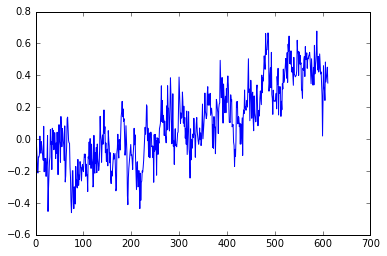

In [10]:
pyplot.plot(T[:,1])

You can add a semicolon at the end of the plotting command to avoid that stuff that appeared on top of the figure, that `Out[x]: [< ...>]` ugliness. Try it.

*Do you see a trend in the data?*

The plot above is certainly useful, but wouldn't it be nicer if we could look at the data relative to the year, instead of the location of the data in the array?

The plot function can take another input; let's get the year displayed as well.

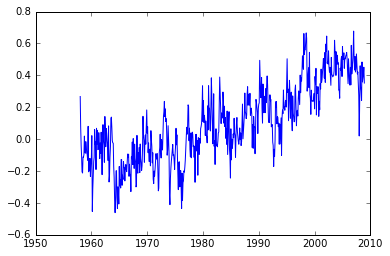

In [11]:
pyplot.plot(T[:,0],T[:,1]);

The temperature anomaly certainly seems to show an increasing trend. But we're not going to stop there, of course. It's not that easy to convince people that the planet is warming, as you know.

Plotting a histogram is as easy as calling the function `hist()`. Why should it be any harder?

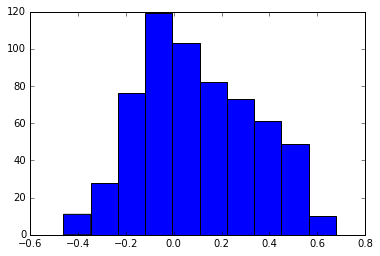

In [12]:
pyplot.hist(T[:,1]);

*What does this plot tell you about the data?* It's more interesting than just an increasing trend, that's for sure. You might want to look at more statistics now: mean, median, standard deviation ... NumPy makes that easy for you:

In [13]:
meanT = numpy.mean(T[:,1])
medianT = numpy.median(T[:,1])
print( meanT, medianT)

0.0997959150327 0.07365


You can control several parameters of the [`hist()`](http://matplotlib.org/1.3.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist) plot. Learn more by reading the manual page (yes, you have to read the manual sometimes!). The first option is the number of bins—the default is 10—but you can also change the appearance (color, transparency). Try some things out.

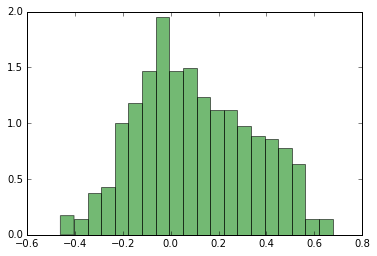

In [14]:
pyplot.hist(T[:,1], 20, normed=1, facecolor='g', alpha=0.55);

This is fun. Finally, we'll put both plots on the same figure using the [`subplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) function, which creates a grid of plots. The argument tells this function how many rows and columns of sub-plots we want, and where in the grid each plot will go.

To help you see what each plotting command is doing, we added comments, which in Python follow the `#` symbol.

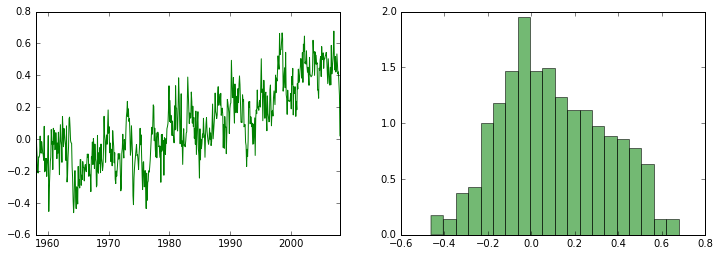

In [15]:
pyplot.figure(figsize=(12,4))  # the size of the figure area
pyplot.subplot(121)            # creates a grid of 1 row, 2 columns and selects the first plot
pyplot.plot(T[:,0],T[:,1],'g') # our time series, but now green
pyplot.xlim(1958,2008)         # set the x-axis limits
pyplot.subplot(122)            # prepares for the second plot
pyplot.hist(T[:,1], 20, normed=1, facecolor='g', alpha=0.55);

## Step 3: Smooth the data and do regression

You see a lot of fluctuations on the time series, so you might be asking yourself "How can I smooth it out?" No? Let's do it anyway.

One possible approach to smooth the data (there are others) is using a *moving average*, also known as a sliding-window average. This is defined as:

$$\hat{x}_{i,n} = \frac{1}{n} \sum_{j=1}^{n} x_{i-j}$$

The only parameter to the moving average is the value $n$. As you can see, the moving average smooths the set of data points by creating a new data set consisting of local averages (of the $n$ previous data points) at each point in the new set.

A moving average is technically a _convolution_, and luckily NumPy has a built-in function for that, `convolve()`. We use it like this:


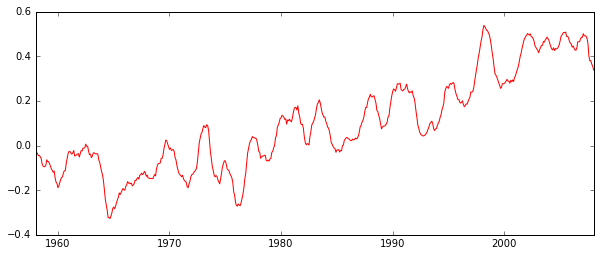

In [16]:
N = 12
window = numpy.ones(N)/N
smooth = numpy.convolve(T[:,1], window, 'same')
pyplot.figure(figsize=(10, 4))
pyplot.plot(T[:,0], smooth, 'r')
pyplot.xlim(1958,2008);

Did you notice the function [`ones()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)? It creates an array filled with ... you guessed it: ones!

We use a _window_ of 12 data points, meaning that the plot shows the average temperature over the last 12 months. Looking at the plot, we can still see a trend, but the range of values is smaller. Let's plot the original time series together with the smoothed version:

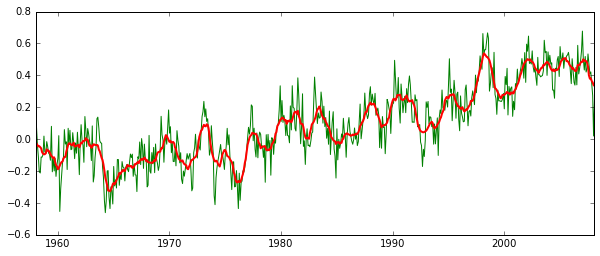

In [17]:
pyplot.figure(figsize=(10, 4))
pyplot.plot(T[:,0], T[:,1], 'g', linewidth=1) # we specify the line width here ...
pyplot.plot(T[:,0], smooth, 'r', linewidth=2) # making the smoothed data a thicker line
pyplot.xlim(1958, 2008);

That is interesting! The smoothed data follows the trend nicely but has much less noise. Well, that is what filtering data is all about. 

Let's now fit a straight line through the temperature-anomaly data, to see the trends. We need to perform a least-squares linear regression to find the slope and intercept of a line 

$$y = mx+b$$

that fits our data. Thankfully, Python and NumPy are here to help with the `polyfit()` function. The function takes three arguments: the two array variables $x$ and $y$, and the order of the polynomial for the fit (in this case, 1 for linear regression).


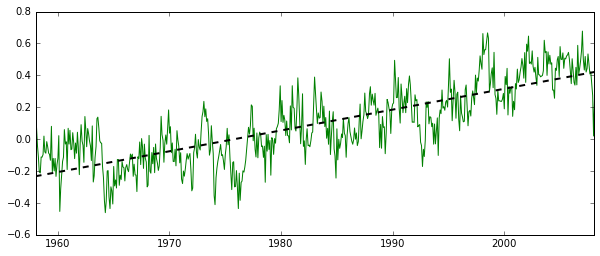

In [18]:
year = T[:,0]   # it's time to use a more friendly name for column 1 of our data
m,b = numpy.polyfit(year, T[:,1], 1)
pyplot.figure(figsize=(10, 4))
pyplot.plot(year, T[:,1], 'g', linewidth=1)
pyplot.plot(year, m * year + b, 'k--', linewidth=2)
pyplot.xlim(1958, 2008);

There is more than one way to do this. Another of the favorite Python libraries is **SciPy**, and it has a `linregress(x,y)` function that will work as well. But let's not get carried away.

## Step 4: Checking for auto-correlation in the data

We won't go into details, but you will learn more about all this if you take a course on experimental methods—for example, at GW, the Mechanical and Aerospace Engineering department offers _"Methods of Engineering Experimentation"_ (MAE-3120).

The fact is that in **time series** (like global temperature anomaly, stock values, etc.), the fluctuations in the data are not random: adjacent data points are not independent. We say that there is _auto-correlation_ in the data.

The problem with auto-correlation is that various techniques in statistical analysis rely on the assumption that scatter (or error) is random. If you apply these techniques willy-nilly, you can get false trends, overestimate uncertainties or exaggerate the goodness of a fit. All bad things!

For the global temperature anomaly, this discussion is crucial: _many critics claim that since there is auto-correlation in the data, no reliable trends can be obtained_

As a well-educated engineering student who cares about the planet, you will appreciate this: we _can_ estimate the trend for the global temperature anomalies taking into account that the data points are not independent. We just need to use more advanced techniques of data analysis.

To finish off this lesson, your first in data analysis with Python, we'll put all our nice plots in one figure frame, and add the _residual_. Because the residual is not random "white" noise, you can conclude that there is auto-correlation in this time series.

Finally, we'll save the plot to an image file using the `savefig()` command of Pyplot—this will be useful to you when you have to prepare reports for your engineering courses!

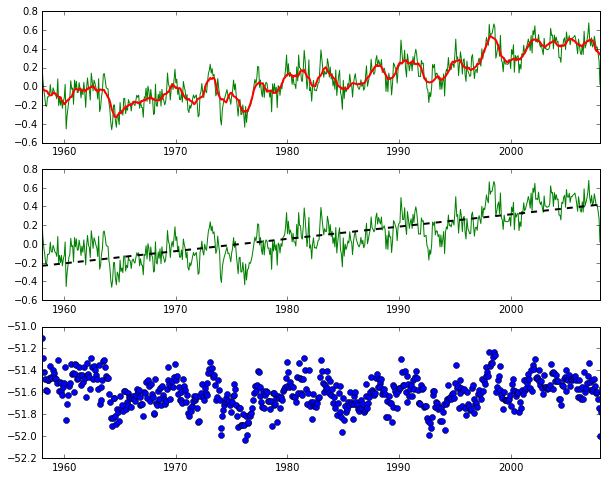

In [19]:
pyplot.figure(figsize=(10, 8))  # the size of the figure area
pyplot.subplot(311)            # creates a grid of 3 columns, 1 row and place the first plot
pyplot.plot(year, T[:,1], 'g', linewidth=1) # we specify the line width here ...
pyplot.plot(year, smooth, 'r', linewidth=2) # making the smoothed data a thicker line
pyplot.xlim(1958, 2008)
pyplot.subplot(312)
pyplot.plot(year, T[:,1], 'g', linewidth=1)
pyplot.plot(year, m * year + b, 'k--', linewidth=2)
pyplot.xlim(1958, 2008)
pyplot.subplot(313)
pyplot.plot(year, T[:,1] - m * year + b, 'o', linewidth=2)
pyplot.xlim(1958, 2008)
pyplot.savefig("TemperatureAnomaly.png")

## Step 5: Generating useful output

Here, we'll use our linear fit to project the temperature into the future.  We'll also save some image files that we could later add to a document or report based on our findings.  First, let's create an expectation of the temperature difference up to the year 2100.


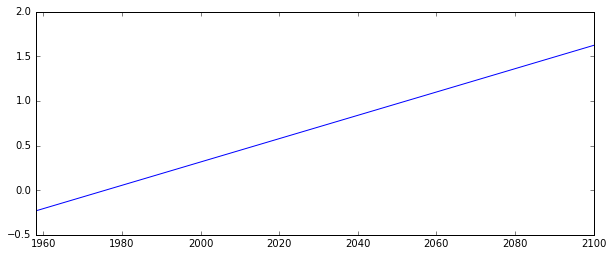

In [20]:
spacing = (2008 + 11 / 12 - 1958) / 612
length = (2100 - 1958) / spacing
length = int(length)   #we'll need an integer for the length of our array
years = numpy.linspace(1958, 2100, num = length)
temp = m * years + b#use our linear regression to estimate future temperature change
pyplot.figure(figsize=(10, 4))
pyplot.plot(years, temp)
pyplot.xlim(1958, 2100)
out=(years, temp) #create a tuple out of years and temperature we can output
out = numpy.array(out).T #form an array and transpose it

Ok, that estimation looks reasonable.  Let's save the data that describes it back to a .csv file, like the one we originally imported.


In [21]:
numpy.savetxt('./resources/GlobalTemperatureEstimate-1958-2100.csv', out, delimiter=",")

Now, lets make a nicer picture that we can show to back up some of our information. We can plot the linear regression as well as the original data and then save the figure.  


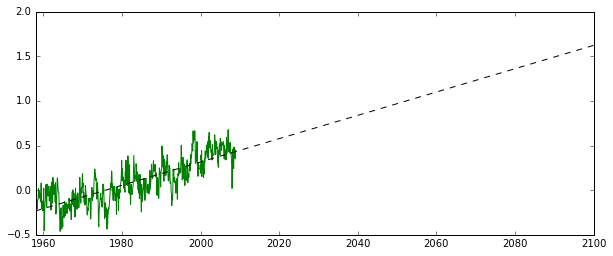

In [22]:
pyplot.figure(figsize = (10, 4))
pyplot.plot(year, T[:,1], 'g')
pyplot.plot(years, temp, 'k--')
pyplot.xlim(1958, 2100)
pyplot.savefig('./resources/GlobalTempPlot.png')

Nice! Now we've got some stuff that we could use in a report, or show to someone unfamiliar with coding.  Remember to play with our settings; I'm sure you could get an even nicer-looking plot if you try!

##### Dig Deeper & Think

1. How is the global temperature anomaly calculated?
2. What does it mean and why is it employed instead of the global mean temperature to quantify global warming?
3. Why is it important to check that the residuals are independent and random when performing linear regression?
4. In this particular case, is it possible to still estimate a trend with confidence?
5. What is your best estimate of the global temperature by the end of the 22nd century?

##### What did we learn?

You should have played around with the embedded code in this notebook, and also written your own version of all the code in a separate Python script to learn:

* how to read data from a comma-separated file
* how to plot the data
* how to do some basic analysis on the data
* how to write to a file

---

In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()